In [1]:
def isNum(a):
    try:
        int(a)
        return True
    except:
        return False
    
import os
data = []
Ys = []
files = os.listdir("data")
for file in files:
    # print(file.split(".")[0]+"_re" in ",".join(files))
    month = int(file[4:6])

    y = "summer" if month in [4, 5, 6, 7, 8, 9] else "winter"
    Ys.append(y)
    
    with open("data/" + file, "r", errors='ignore') as f:
        data.append([int(i) for i in f.read().split("\n") if isNum(i)])

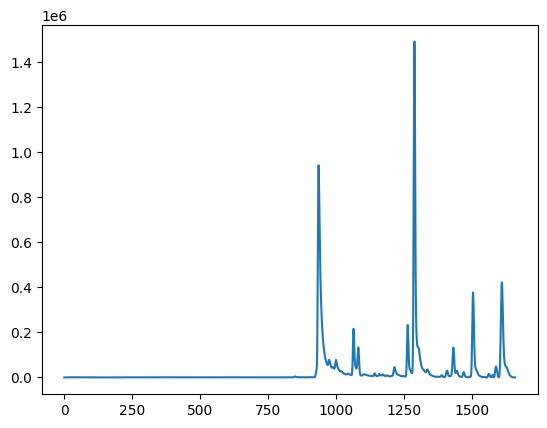

In [2]:
import pylab
import numpy as np
for i in range(len(data)):
    old_array = np.array(data[i])
    new_array = old_array[old_array>=-500]
    data[i] = new_array

pylab.plot(data[i])


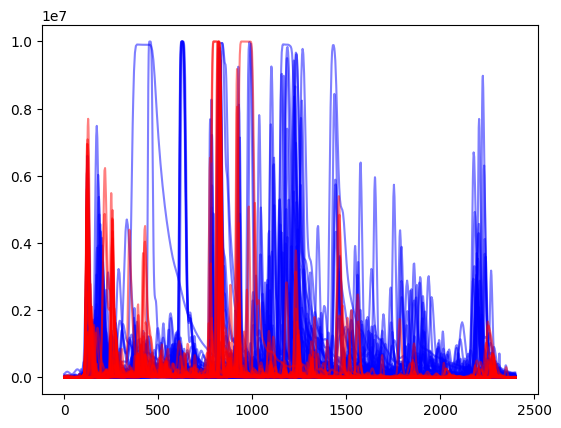

In [3]:
new_data = []
Ys = np.array(Ys)
from scipy.interpolate import interp1d
import random
gamma = 1.5
for i in range(len(data)):
    arr = np.array(data[i])
    mean = np.mean(data[i])
    indices = np.where(data[i]>gamma * mean)
    indxf = indices[0][0] - 50
    indxl = indices[0][-1] + 50
    
    new = arr[indxf:indxl]
    interp_func = interp1d(np.linspace(0, 2400, len(new)), new)
    newarr = interp_func(np.arange(2400))
    new_data.append(newarr)
new_data = np.array(new_data)
#color based on Ys
pylab.plot(np.arange(2400), new_data[Ys=="winter"].T, alpha=0.5, c="blue")
pylab.plot(np.arange(2400), new_data[Ys=="summer"].T, alpha=0.5, c="red")
pylab.show()

In [4]:
new_data.shape, len(Ys)

((193, 2400), 193)

In [5]:
import pickle
with open("data.pkl", "wb") as f:
    pickle.dump({
        "data": new_data,
        "Ys": Ys
    }, f)

In [6]:
with open("data.pkl", "rb") as f:
    data = pickle.load(f)